1. Data Loading and Exploration:

Chargement des librairies

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.display import display

pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_style("whitegrid")  # Style plus simple qui fonctionne toujours
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (10, 6)  # Taille par défaut des figures

Chargement des données et premières explorations

In [81]:
df = pd.read_csv('train.csv')

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.20,0,1,0,7,0.60,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.50,1,0,1,53,0.70,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.50,1,2,1,41,0.90,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.50,0,0,0,10,0.80,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.20,0,13,1,44,0.60,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.00,1238.52,439.42,501.00,851.75,1226.00,1615.25,1998.00
blue,2000.00,0.49,0.50,0.00,0.00,0.00,1.00,1.00
clock_speed,2000.00,1.52,0.82,0.50,0.70,1.50,2.20,3.00
dual_sim,2000.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00
fc,2000.00,4.31,4.34,0.00,1.00,3.00,7.00,19.00
four_g,2000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
int_memory,2000.00,32.05,18.15,2.00,16.00,32.00,48.00,64.00
m_dep,2000.00,0.50,0.29,0.10,0.20,0.50,0.80,1.00
mobile_wt,2000.00,140.25,35.40,80.00,109.00,141.00,170.00,200.00
n_cores,2000.00,4.52,2.29,1.00,3.00,4.00,7.00,8.00


In [84]:

from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2000   │ │ int64       │ 19    │                                                          │
│ │ Number of columns │ 21     │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column            ┃ NA  ┃ NA %   ┃ mean     ┃ sd       ┃ p0   ┃ p25     ┃ p50   ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ battery_power     │   0 │      0 │     1239 │    439.4 │  501 │   851.8 │  1226 │   1615 │  1998 │ ▇▇▇▇▇▇  │  │
│ │ blue              │   0 │      0 │    0.495 │   0.5001 │    0 │       0 │     0 │      1 │     1 │ ▇    ▇  │  │
│ │ clock_speed       │   0 │      0 │    1.522 │    0.816 │  0.5 │     0.7 │   1.5 │    2.2 │     3 │ ▇▃▃▃▃▃  │  │
│ │ dual_sim          │   0 │      0 │   0.5095 │      0.5 │    0 │       0 │     1 │      1 │     1 │ ▇    ▇  │  │
│ │ fc                │   0 │      0 │    4.309 │    4.341 │    0 │       1 │     3 │      7 │    19 │  ▇▃▂▁▁  │  │
│ │ four_g            │   0 │      0 │   0.5215 │   0.4997 │    0 │       0 │     1 │      1 │     1 │ ▇    ▇  │  │
│ │ int_memory        │   0 │      0 │    32.05 │    18.15 │    2 │      16 │    32 │     48 │    64 │ ▇▇▇▇▇▇  │  │
│ │ m_dep             │   0 │      0 │   0.5018 │   0.2884 │  0.1 │     0.2 │   0.5 │    0.8 │     1 │ ▇▃▆▃▆▅  │  │
│ │ mobile_wt         │   0 │      0 │    140.2 │     35.4 │   80 │     109 │   141 │    170 │   200 │ ▇▇▇▇▇▇  │  │
│ │ n_cores           │   0 │      0 │    4.521 │    2.288 │    1 │       3 │     4 │      7 │     8 │ ▇▃▅▃▃▇  │  │
│ │ pc                │   0 │      0 │    9.916 │    6.064 │    0 │       5 │    10 │     15 │    20 │ ▇▅▆▇▆▇  │  │
│ │ px_height         │   0 │      0 │    645.1 │    443.8 │    0 │   282.8 │   564 │  947.2 │  1960 │ ▇▇▅▃▂▁  │  │
│ │ px_width          │   0 │      0 │     1252 │    432.2 │  500 │   874.8 │  1247 │   1633 │  1998 │ ▇▇▇▇▇▇  │  │
│ │ ram               │   0 │      0 │     2124 │     1085 │  256 │    1208 │  2146 │   3064 │  3998 │ ▇▇▇▇▇▇  │  │
│ │ sc_h              │   0 │      0 │    12.31 │    4.213 │    5 │       9 │    12 │     16 │    19 │ ▇▅▅▇▅▇  │  │
│ │ sc_w              │   0 │      0 │    5.767 │    4.356 │    0 │       2 │     5 │      9 │    18 │ ▇▇▆▅▂▁  │  │
│ │ talk_time         │   0 │      0 │    11.01 │    5.464 │    2 │       6 │    11 │     16 │    20 │ ▆▆▆▆▆▇  │  │
│ │ three_g           │   0 │      0 │   0.7615 │   0.4263 │    0 │       1 │     1 │      1 │     1 │ ▃    ▇  │  │
│ │ touch_screen      │   0 │      0 │    0.503 │   0.5001 │    0 │       0 │     1 │      1 │     1 │ ▇    ▇  │  │
│ │ wifi              │   0 │      0 │    0.507 │   0.5001 │    0 │       0 │     1 │      1 │     1 │ ▇    ▇  │  │
│ │ price_range       │   0 │      0 │      1.5 │    1.118 │    0 │    0.75 │   1.5 │   2.25 │     3 │ ▇ ▇ ▇▇  │  │
│ └───────────────────┴─────┴────────┴──────────┴──────────┴──────┴─────────┴───────┴────────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── 

2. Data Cleaning and Preprocessing:

In [85]:
# Vérification des valeurs manquantes
print(df.isna().sum())
print("Doublons :", df.duplicated().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
Doublons : 0


Pas de données manquantes

3. Statistical Analysis with NumPy and SciPy:

ANALYSE COMPLÈTE DU DATASET

=== APERÇU DES DONNÉES ===


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.20,0,1,0,7,0.60,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.50,1,0,1,53,0.70,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.50,1,2,1,41,0.90,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.50,0,0,0,10,0.80,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.20,0,13,1,44,0.60,141,2,14,1208,1212,1411,8,2,15,1,1,0,1



Dimensions: 2000 lignes x 21 colonnes
=== STATISTIQUES DESCRIPTIVES ===


,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
battery_power,2000.00,1238.52,439.42,501.00,851.75,1226.00,1615.25,1998.00,0.03,-1.22
blue,2000.00,0.49,0.50,0.00,0.00,0.00,1.00,1.00,0.02,-2.00
clock_speed,2000.00,1.52,0.82,0.50,0.70,1.50,2.20,3.00,0.18,-1.32
dual_sim,2000.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00,-0.04,-2.00
fc,2000.00,4.31,4.34,0.00,1.00,3.00,7.00,19.00,1.02,0.28
four_g,2000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00,-0.09,-1.99
int_memory,2000.00,32.05,18.15,2.00,16.00,32.00,48.00,64.00,0.06,-1.22
m_dep,2000.00,0.50,0.29,0.10,0.20,0.50,0.80,1.00,0.09,-1.27
mobile_wt,2000.00,140.25,35.40,80.00,109.00,141.00,170.00,200.00,0.01,-1.21
n_cores,2000.00,4.52,2.29,1.00,3.00,4.00,7.00,8.00,0.00,-1.23



=== DISTRIBUTIONS DES VARIABLES ===


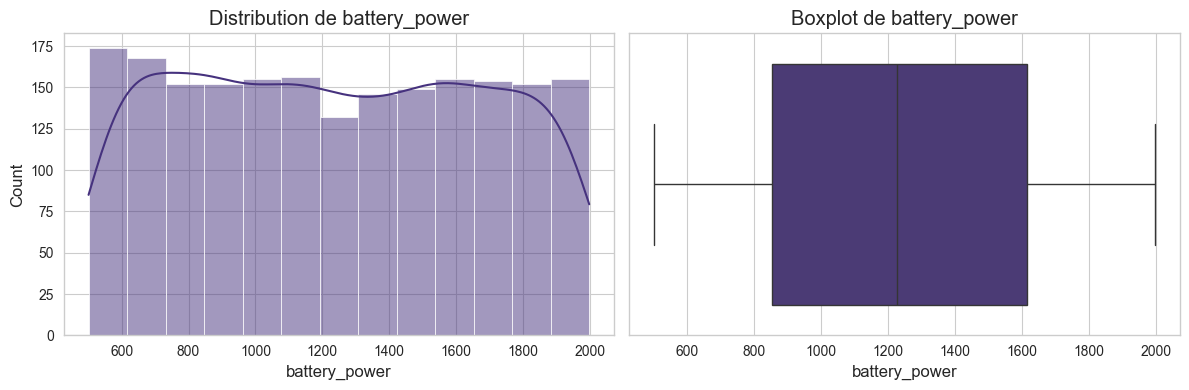

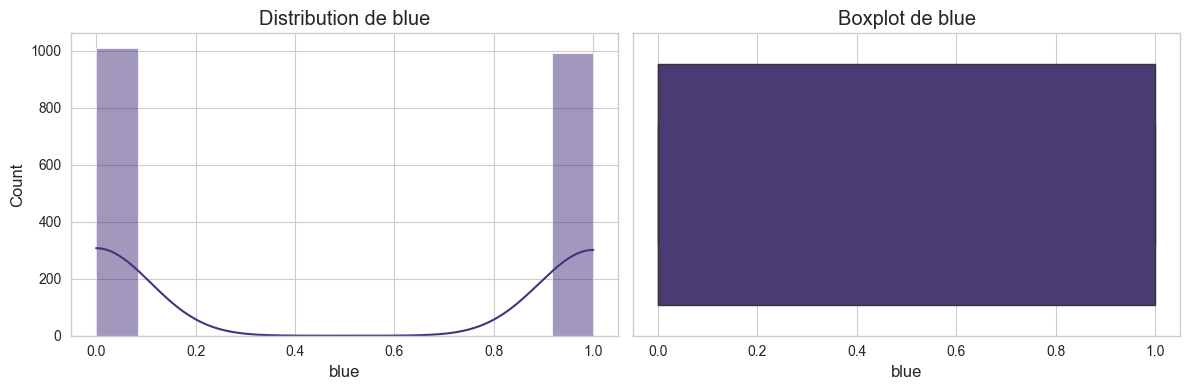

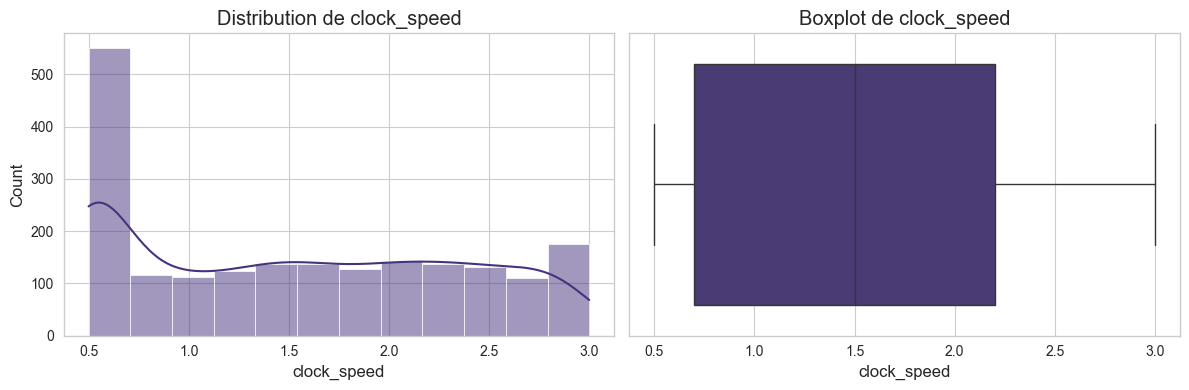

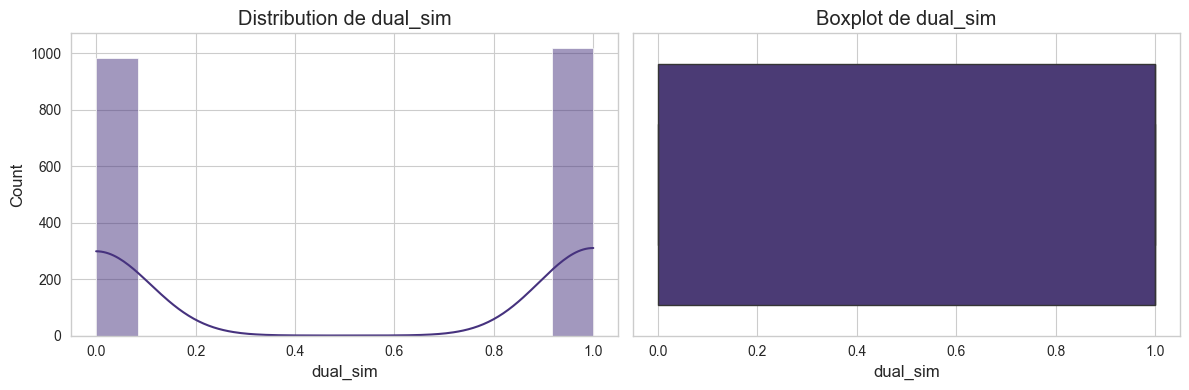

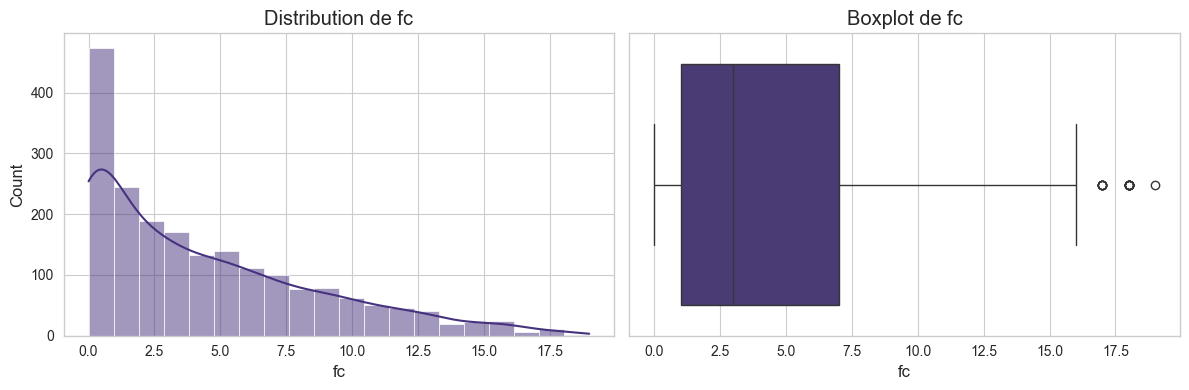

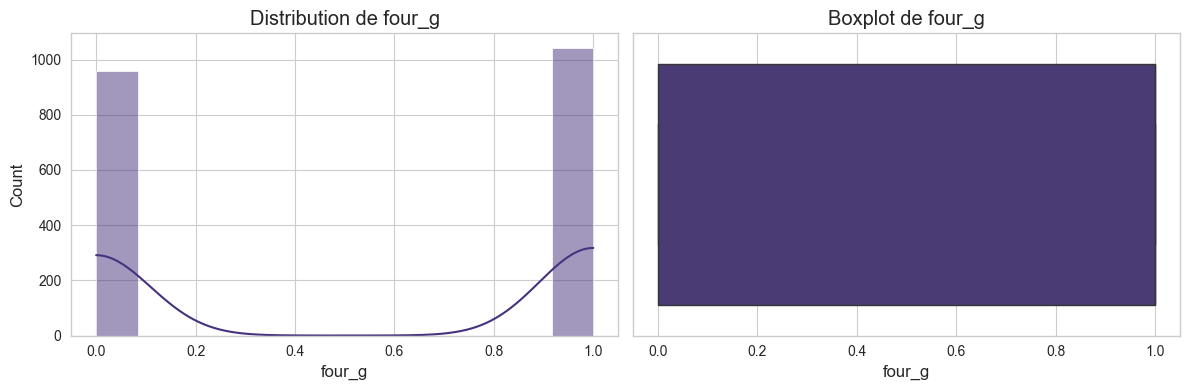

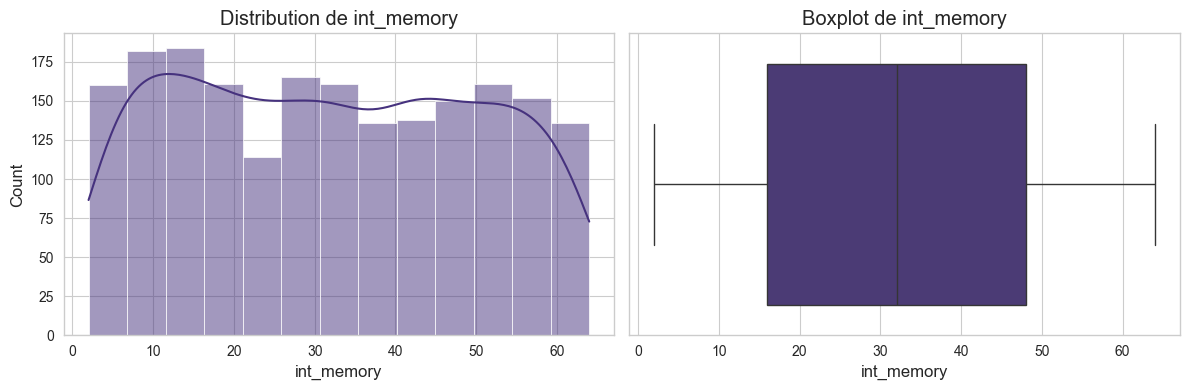

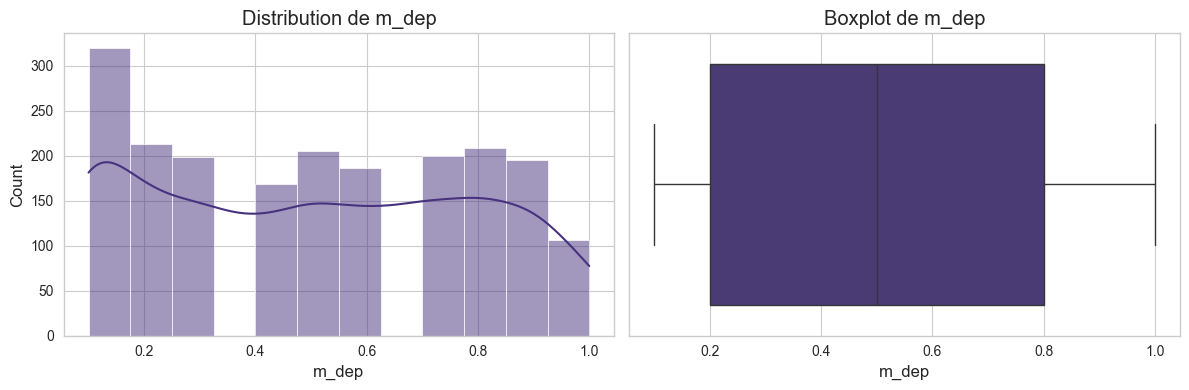

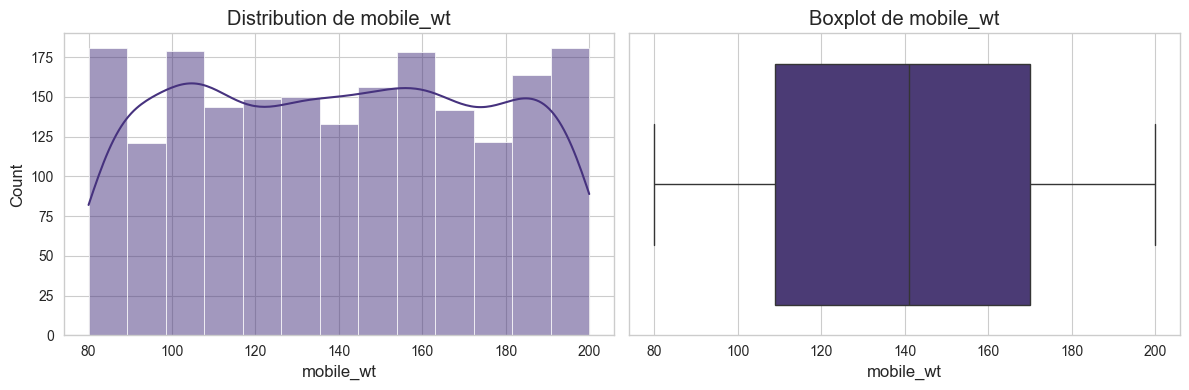

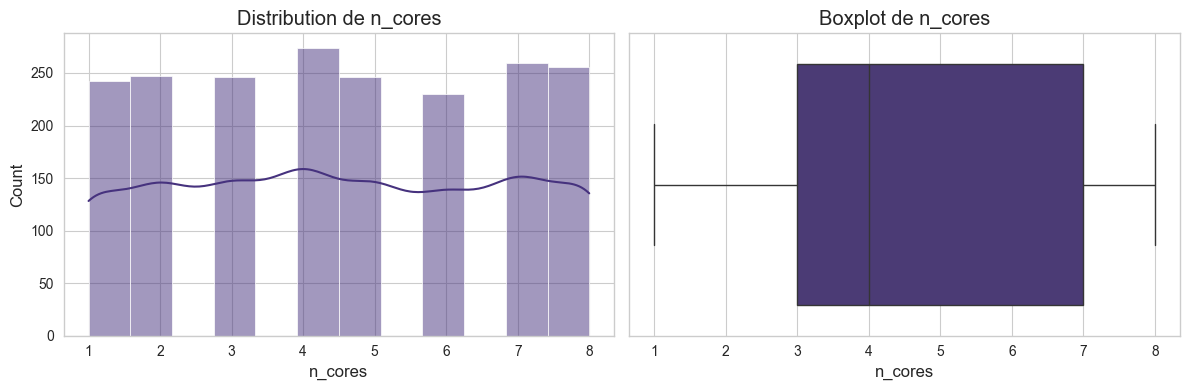

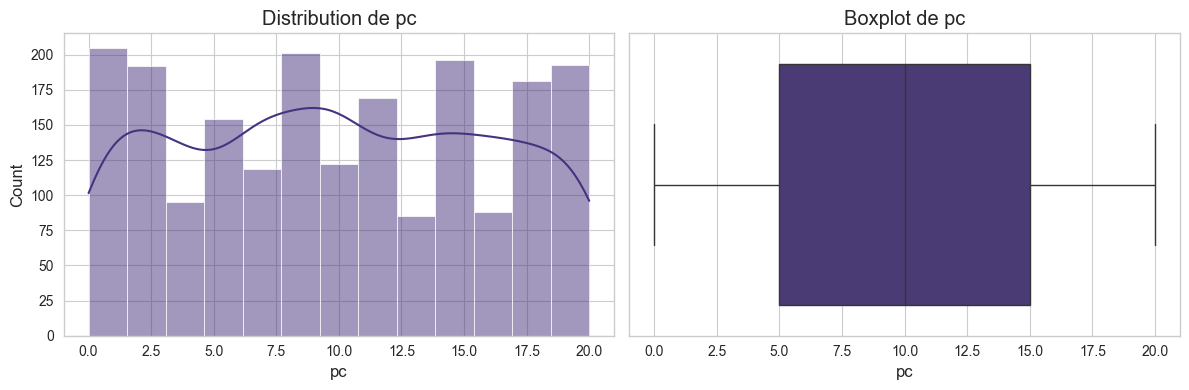

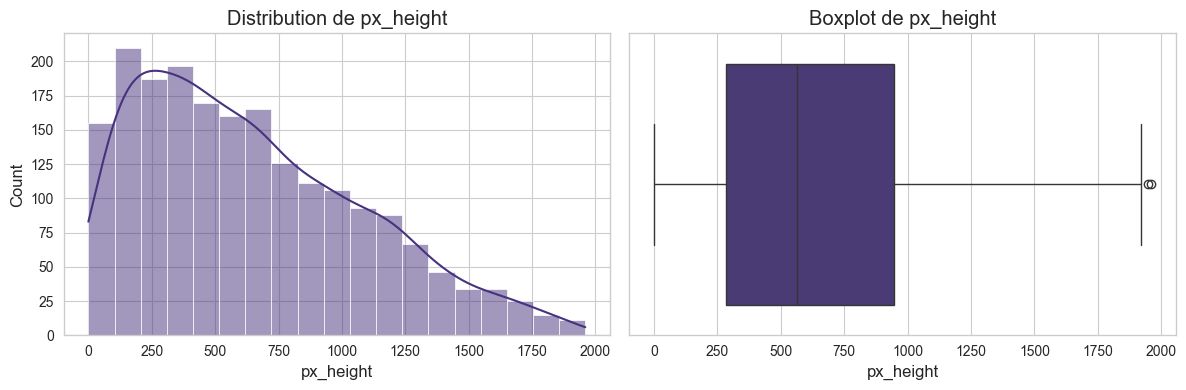

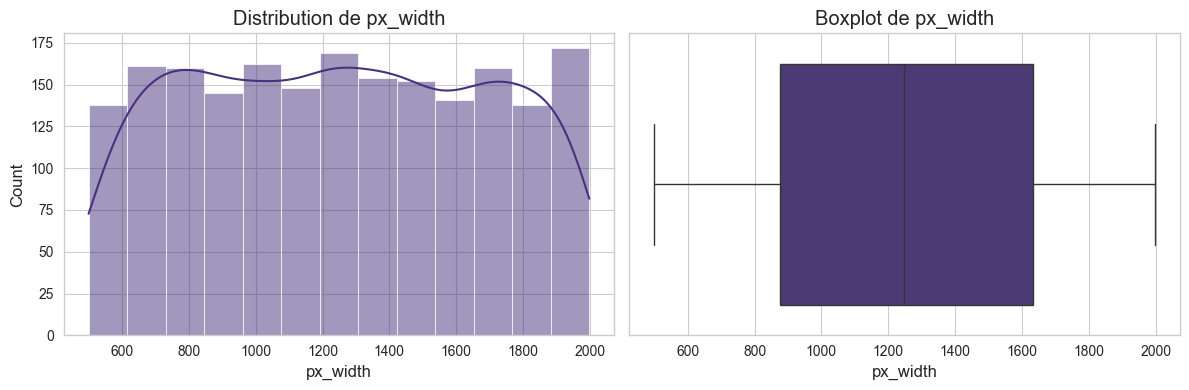

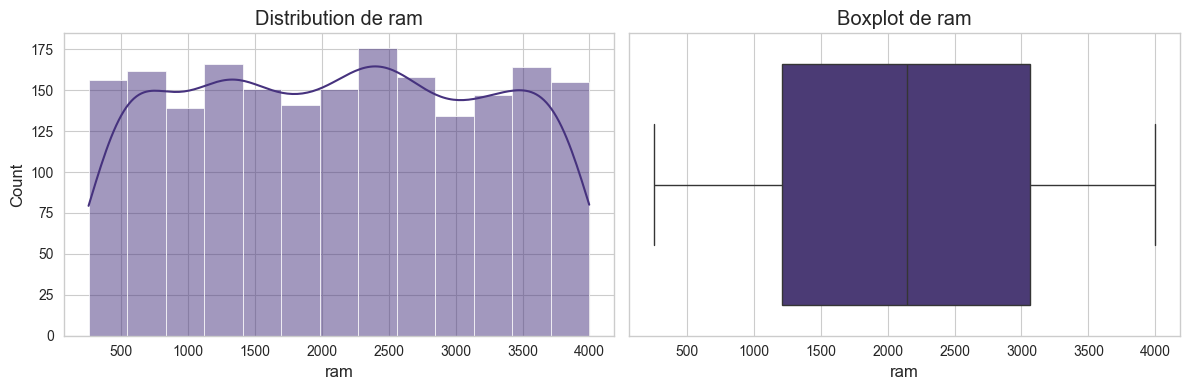

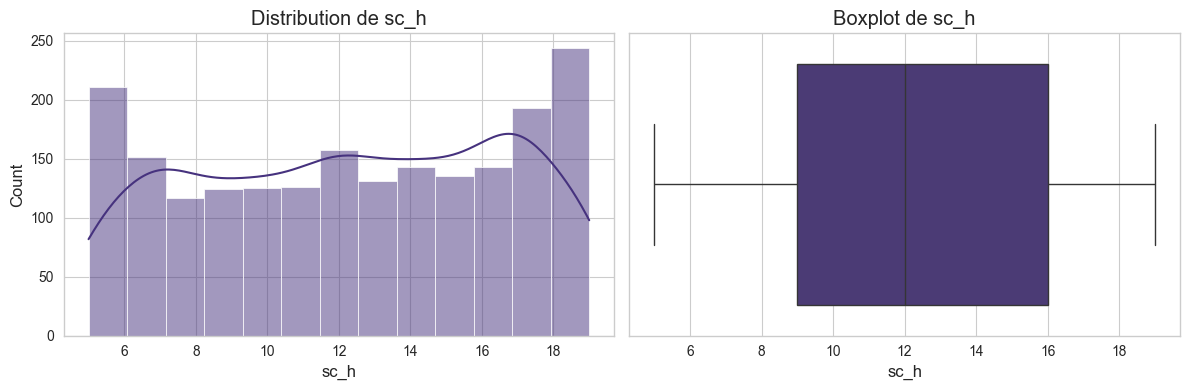

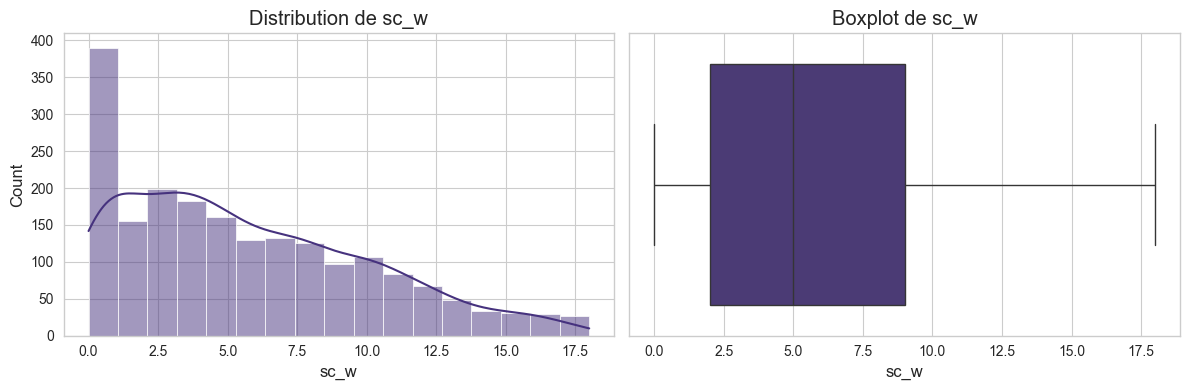

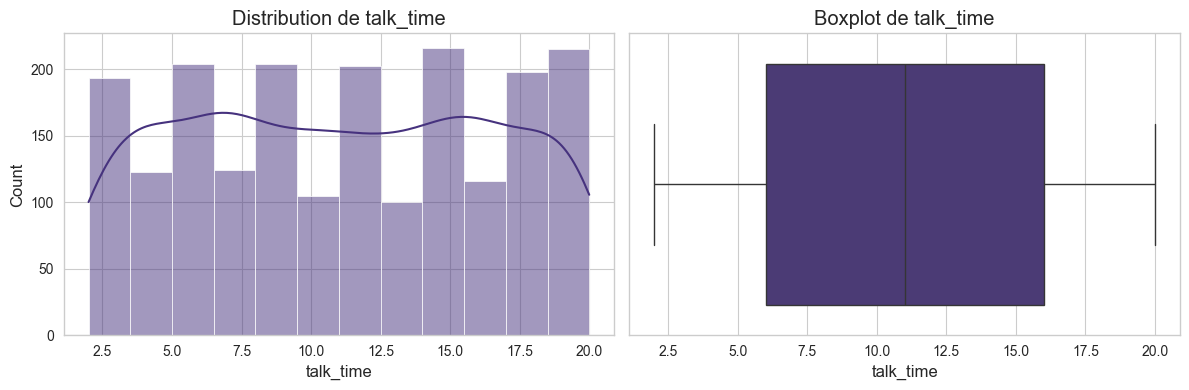

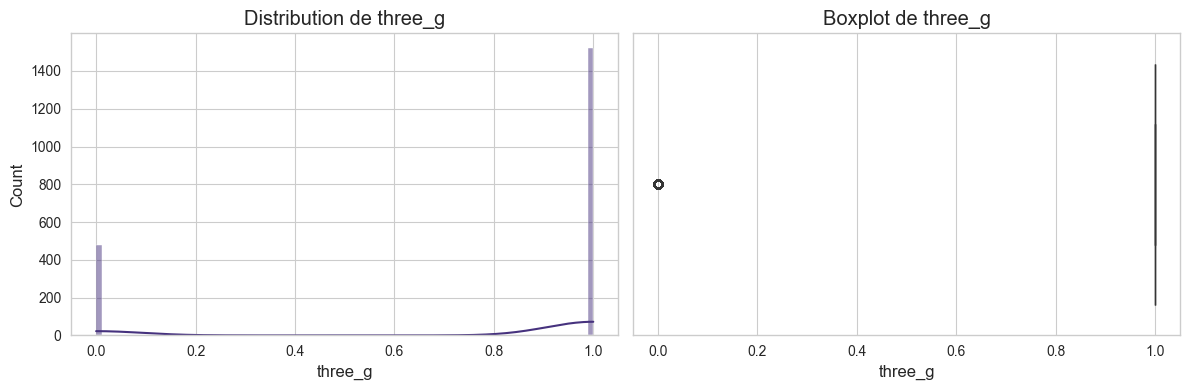

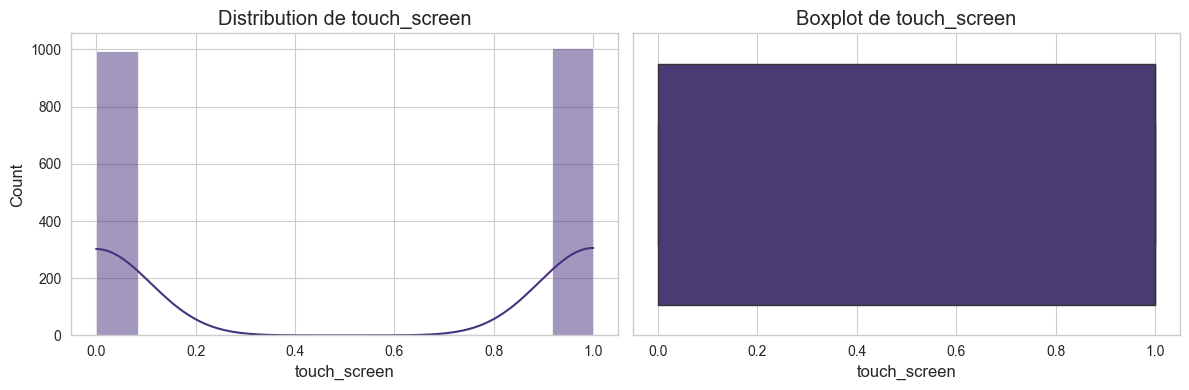

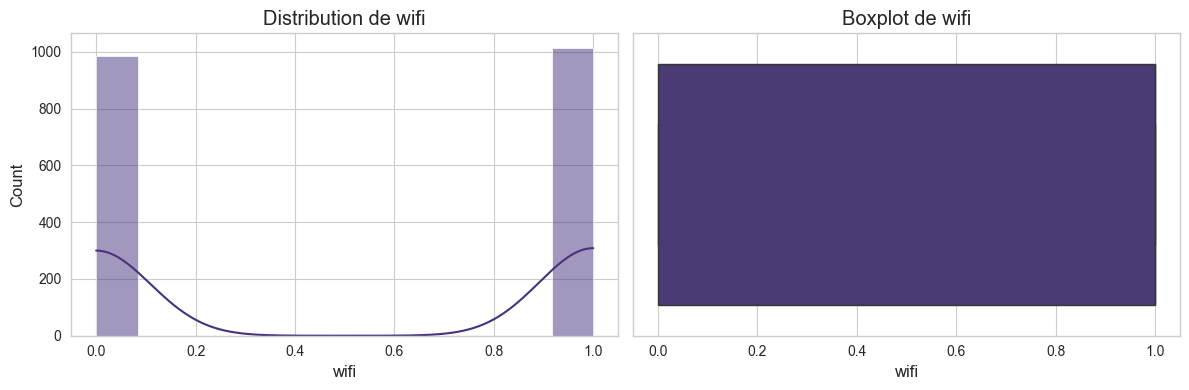

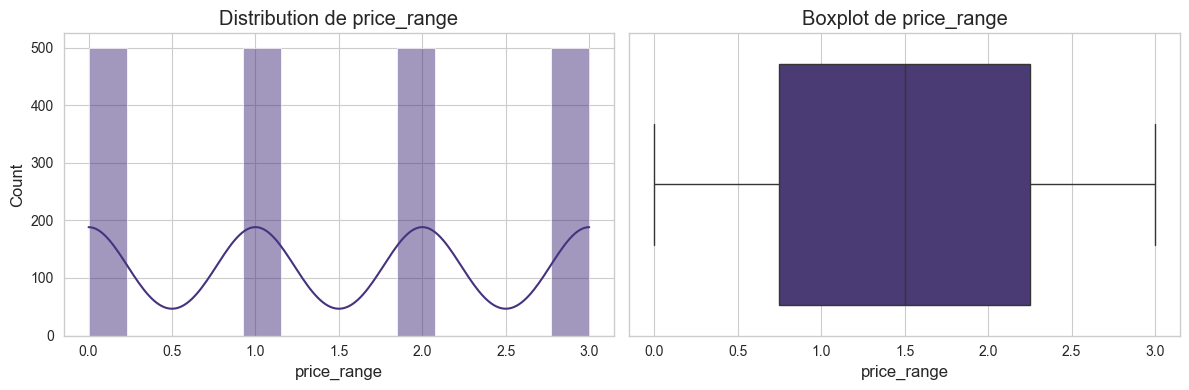


=== RELATIONS AVEC PRICE_RANGE ===

Corrélations avec la cible:


,Corrélation
ram,0.92
battery_power,0.20
px_width,0.17
px_height,0.13
int_memory,0.04
pc,0.03
touch_screen,-0.03
mobile_wt,-0.03
sc_w,0.02
fc,0.02


C:\Users\Zbook\AppData\Local\Temp\ipykernel_25416\2272223296.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette='viridis')


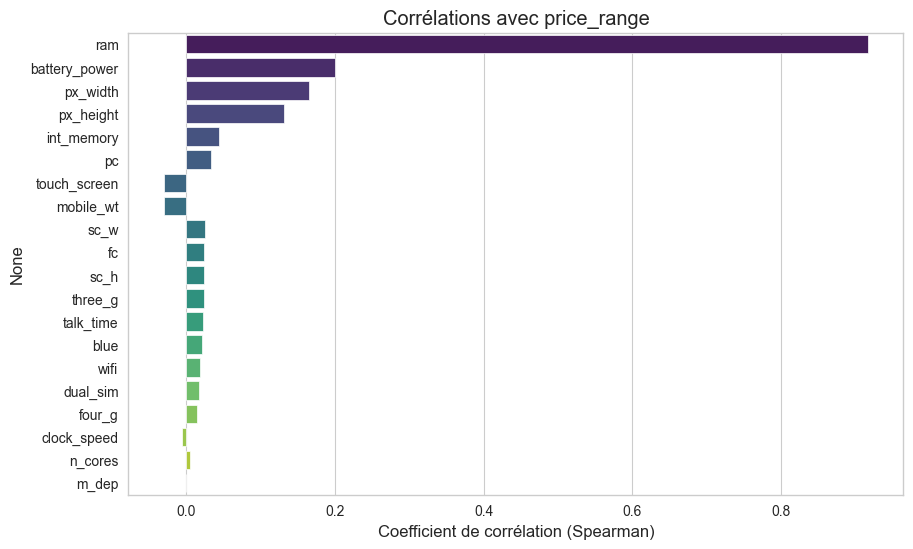


ANOVA (différence entre groupes):


,Variable,F-value,p-value,Significatif
13,ram,3520.110824,0.000000,True
0,battery_power,31.598158,0.000000,True
12,px_width,22.620882,0.000000,True
11,px_height,19.484842,0.000000,True
8,mobile_wt,3.594318,0.013117,True
6,int_memory,2.922996,0.032777,True
9,n_cores,2.625415,0.048936,True
14,sc_h,2.225984,0.083250,False
15,sc_w,1.671000,0.171215,False
16,talk_time,1.628811,0.180669,False


=== DÉTECTION DES OUTLIERS ===


,Variable,Outliers,% Outliers,Bornes
17,three_g,477,23.8%,"[1.0, 1.0]"
4,fc,18,0.9%,"[-8.0, 16.0]"
11,px_height,2,0.1%,"[-714.0, 1944.0]"
0,battery_power,0,0.0%,"[-293.5, 2760.5]"
1,blue,0,0.0%,"[-1.5, 2.5]"
3,dual_sim,0,0.0%,"[-1.5, 2.5]"
2,clock_speed,0,0.0%,"[-1.6, 4.5]"
7,m_dep,0,0.0%,"[-0.7, 1.7]"
5,four_g,0,0.0%,"[-1.5, 2.5]"
8,mobile_wt,0,0.0%,"[17.5, 261.5]"


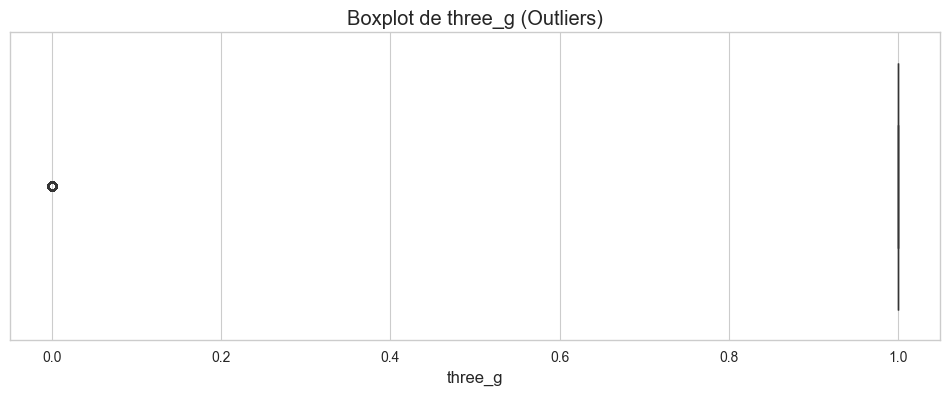

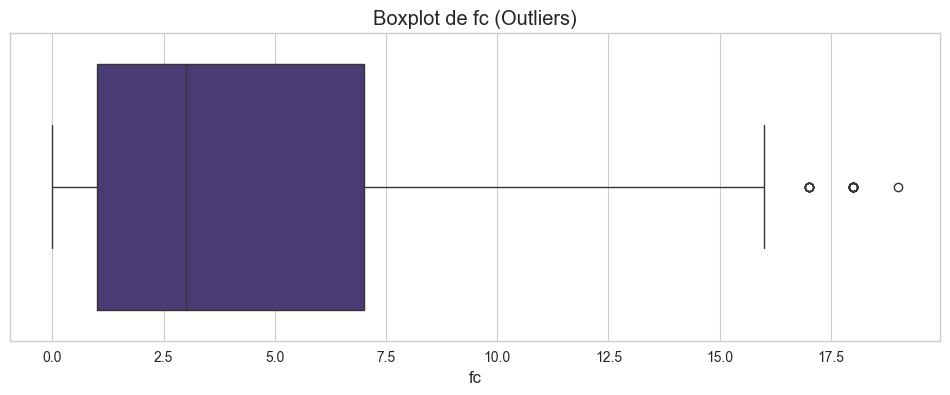

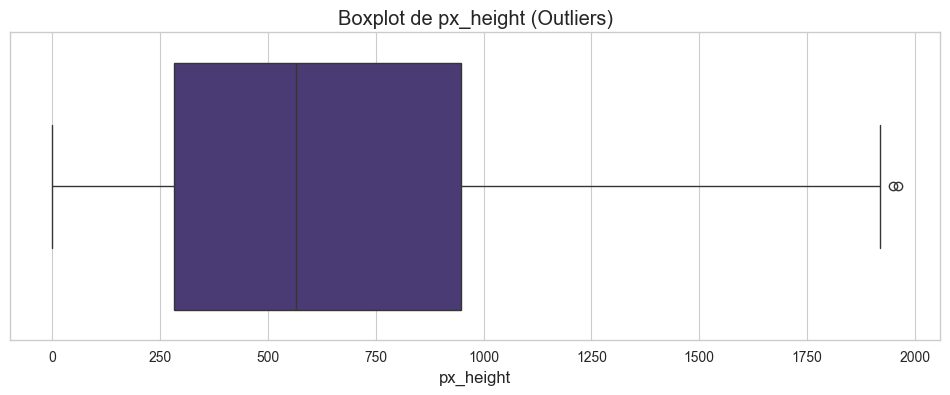

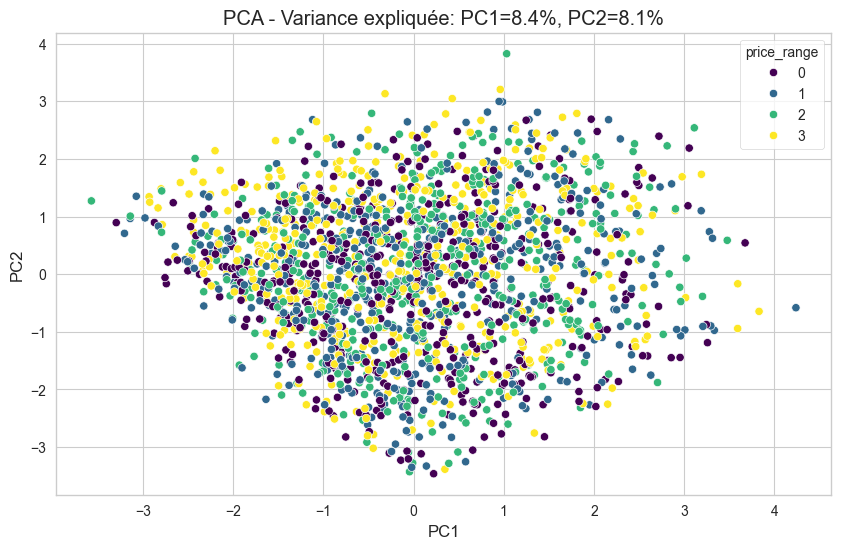

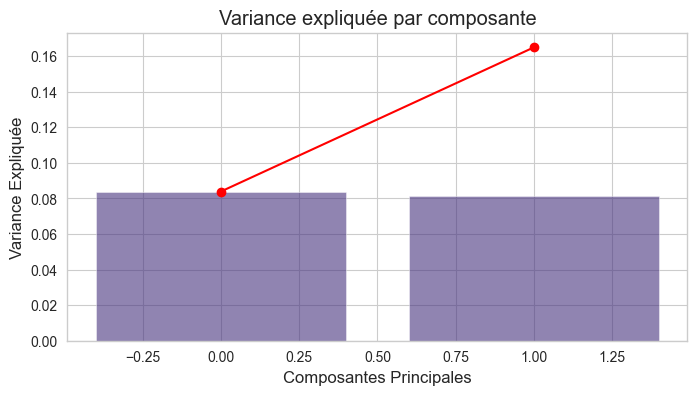

In [86]:
# 1. Fonction utilitaire pour les colonnes numériques
def get_numeric_cols(df, exclude=None):
    """Retourne les colonnes numériques en excluant celles spécifiées"""
    exclude = exclude or []
    return [col for col in df.select_dtypes(include=['int64', 'float64']).columns 
            if col not in exclude]

# 2. Analyse descriptive optimisée
def comprehensive_descriptive_analysis(df):
    """Analyse descriptive complète avec visualisations"""
    numeric_cols = get_numeric_cols(df)
    
    # a. Statistiques descriptives
    desc_stats = df[numeric_cols].describe().T
    desc_stats['skewness'] = df[numeric_cols].skew()
    desc_stats['kurtosis'] = df[numeric_cols].kurtosis()
    
    print("=== STATISTIQUES DESCRIPTIVES ===")
    display(desc_stats)
    
    # b. Visualisation des distributions
    print("\n=== DISTRIBUTIONS DES VARIABLES ===")
    for col in numeric_cols:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        
        # Histogramme
        sns.histplot(df[col], kde=True, ax=ax1)
        ax1.set_title(f'Distribution de {col}')
        
        # Boxplot
        sns.boxplot(x=df[col], ax=ax2)
        ax2.set_title(f'Boxplot de {col}')
        
        plt.tight_layout()
        plt.show()

# 3. Analyse des relations avec la cible optimisée
def target_relationship_analysis(df, target_col='price_range'):
    """Analyse des relations avec la variable cible"""
    if target_col not in df.columns:
        print(f"Erreur: La colonne '{target_col}' n'existe pas")
        return
    
    numeric_cols = get_numeric_cols(df, exclude=[target_col])
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    print(f"\n=== RELATIONS AVEC {target_col.upper()} ===")
    
    # a. Corrélations
    corr_matrix = df[numeric_cols + [target_col]].corr(method='spearman')
    target_corr = corr_matrix[target_col].drop(target_col).sort_values(key=abs, ascending=False)
    
    print("\nCorrélations avec la cible:")
    display(target_corr.to_frame('Corrélation'))
    
    # Visualisation
    plt.figure(figsize=(10, 6))
    sns.barplot(x=target_corr.values, y=target_corr.index, palette='viridis')
    plt.title(f"Corrélations avec {target_col}")
    plt.xlabel("Coefficient de corrélation (Spearman)")
    plt.show()
    
    # b. ANOVA pour variables numériques
    print("\nANOVA (différence entre groupes):")
    anova_results = []
    for col in numeric_cols:
        groups = [df[df[target_col] == i][col] for i in sorted(df[target_col].unique())]
        f_val, p_val = stats.f_oneway(*groups)
        anova_results.append({
            'Variable': col,
            'F-value': f_val,
            'p-value': p_val,
            'Significatif': p_val < 0.05
        })
    
    anova_df = pd.DataFrame(anova_results).sort_values('p-value')
    display(anova_df.style.bar(subset=['F-value'], color='#5fba7d'))
    
    # c. Test du chi2 pour variables catégorielles
    if len(categorical_cols) > 0:
        print("\nTest d'indépendance (chi2):")
        chi2_results = []
        for col in categorical_cols:
            contingency = pd.crosstab(df[col], df[target_col])
            chi2, p_val, _, _ = stats.chi2_contingency(contingency)
            chi2_results.append({
                'Variable': col,
                'Chi2': chi2,
                'p-value': p_val,
                'Significatif': p_val < 0.05
            })
        
        chi2_df = pd.DataFrame(chi2_results).sort_values('p-value')
        display(chi2_df.style.bar(subset=['Chi2'], color='#5fba7d'))

# 4. Détection des outliers optimisée
def detect_outliers(df, threshold=1.5):
    """Détection et visualisation des outliers"""
    numeric_cols = get_numeric_cols(df)
    
    print("=== DÉTECTION DES OUTLIERS ===")
    
    outliers_info = []
    for col in numeric_cols:
        q1, q3 = np.percentile(df[col], [25, 75])
        iqr = q3 - q1
        lower, upper = q1 - threshold*iqr, q3 + threshold*iqr
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        
        outliers_info.append({
            'Variable': col,
            'Outliers': len(outliers),
            '% Outliers': f"{len(outliers)/len(df)*100:.1f}%",
            'Bornes': f"[{lower:.1f}, {upper:.1f}]"
        })
    
    outliers_df = pd.DataFrame(outliers_info).sort_values('Outliers', ascending=False)
    display(outliers_df.style.background_gradient(subset=['Outliers'], cmap='Reds'))
    
    # Visualisation pour les variables avec le plus d'outliers
    top_outliers = outliers_df.head(3)['Variable'].tolist()
    for col in top_outliers:
        plt.figure(figsize=(12, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot de {col} (Outliers)")
        plt.show()

# 5. Analyse PCA
def perform_pca(df, target_col='price_range', n_components=2):
    """Analyse en composantes principales"""
    if target_col not in df.columns:
        print(f"Erreur: La colonne '{target_col}' n'existe pas")
        return
    
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    # Standardisation
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(X_scaled)
    pca_df = pd.DataFrame(data=principal_components, 
                         columns=[f'PC{i+1}' for i in range(n_components)])
    pca_df[target_col] = y
    
    # Visualisation
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PC1', y='PC2', hue=target_col, data=pca_df, palette='viridis')
    plt.title(f"PCA - Variance expliquée: PC1={pca.explained_variance_ratio_[0]*100:.1f}%, "
              f"PC2={pca.explained_variance_ratio_[1]*100:.1f}%")
    plt.show()
    
    # Variance expliquée
    plt.figure(figsize=(8, 4))
    plt.bar(range(n_components), pca.explained_variance_ratio_, alpha=0.6)
    plt.plot(range(n_components), np.cumsum(pca.explained_variance_ratio_), 'ro-')
    plt.xlabel('Composantes Principales')
    plt.ylabel('Variance Expliquée')
    plt.title('Variance expliquée par composante')
    plt.show()

# Fonction principale pour exécuter toutes les analyses
def run_full_analysis(df):
    """Exécute l'analyse complète du dataset"""
    print("="*50)
    print("ANALYSE COMPLÈTE DU DATASET")
    print("="*50)
    
    # Aperçu des données
    print("\n=== APERÇU DES DONNÉES ===")
    display(df.head())
    print(f"\nDimensions: {df.shape[0]} lignes x {df.shape[1]} colonnes")
    
    # Analyses
    comprehensive_descriptive_analysis(df)
    target_relationship_analysis(df)
    detect_outliers(df)
    perform_pca(df)

# Exécution de l'analyse complète
run_full_analysis(df)

Conclusions principales :

- La RAM est de loin la caractéristique la plus importante pour déterminer la gamme de prix
- La résolution d'écran et la capacité de la batterie sont également très importantes
- Les téléphones sont bien séparés en groupes selon leurs caractéristiques techniques

Recommandations :
- Pour positionner un téléphone dans une gamme de prix supérieure, augmenter la RAM et la résolution d'écran
- Les caractéristiques comme le Bluetooth ou le double SIM ont moins d'impact sur le prix